In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('train/*')

In [7]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 78s 1s/step - loss: 3.2948 - accuracy: 0.7160 - val_loss: 0.4657 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 76s 1s/step - loss: 0.6056 - accuracy: 0.8780 - val_loss: 0.2674 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 82s 1s/step - loss: 0.6219 - accuracy: 0.8903 - val_loss: 1.4542 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 79s 1s/step - loss: 0.8798 - accuracy: 0.8831 - val_loss: 1.9907 - val_accuracy: 0.7778
Epoch 5/20
61/61 [==============================] - 81s 1s/step - loss: 0.6090 - accuracy: 0.9139 - val_loss: 0.0791 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 80s 1s/step - loss: 0.7568 - accuracy: 0.9113 - val_loss: 0.3900 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 82s 1s/step - loss: 0.4876 - acc

In [16]:

import matplotlib.pyplot as plt

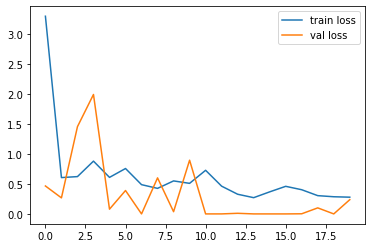

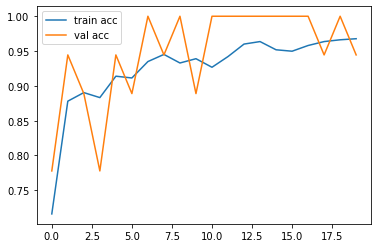

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[3.03096827e-24, 1.00000000e+00, 1.60624237e-12, 2.43245203e-13],
       [1.23161080e-33, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.54407872e-13, 8.99073184e-01, 2.87017909e-10, 1.00926816e-01],
       [2.78850561e-21, 0.00000000e+00, 1.00000000e+00, 1.40832334e-37],
       [8.68301839e-03, 1.53985841e-21, 9.91317034e-01, 1.09963565e-13],
       [1.52683216e-37, 4.61067363e-22, 7.71421612e-36, 1.00000000e+00],
       [1.84011290e-19, 1.88536113e-18, 1.01586006e-15, 1.00000000e+00],
       [6.75195948e-36, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.62760847e-26, 1.00000000e+00, 1.41049466e-23, 2.56679359e-15],
       [4.61715874e-11, 1.34463177e-14, 8.40158812e-17, 1.00000000e+00],
       [1.02051324e-15, 5.43708143e-20, 1.00000000e+00, 2.53025734e-09],
       [1.00000000e+00, 2.03513138e-29, 1.14997590e-28, 2.21169721e-34],
       [4.07335823e-24, 6.81327824e-14, 1.96858005e-27, 1.00000000e+00],
       [3.60135478e-13, 7.05034772e-12, 1.00000000e

In [21]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:

y_pred

array([1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2, 0, 3, 2, 0, 0, 0, 1], dtype=int64)

In [23]:
model=load_model('model_resnet50.h5')

In [25]:
img=image.load_img('test/diseased cotton plant/dd (328).jpg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[ 78.,  94.,  32.],
        [ 79.,  92.,  36.],
        [ 85.,  93.,  42.],
        ...,
        [187., 239., 113.],
        [188., 239., 110.],
        [188., 239., 110.]],

       [[ 82.,  96.,  34.],
        [ 88.,  99.,  41.],
        [ 91.,  98.,  46.],
        ...,
        [179., 234., 106.],
        [184., 241., 110.],
        [183., 240., 109.]],

       [[ 88.,  98.,  37.],
        [ 90.,  95.,  37.],
        [ 95.,  98.,  43.],
        ...,
        [179., 239., 105.],
        [178., 241., 108.],
        [175., 238., 105.]],

       ...,

       [[101., 123.,  59.],
        [119., 138.,  74.],
        [130., 145.,  80.],
        ...,
        [129., 221.,  34.],
        [126., 218.,  31.],
        [125., 217.,  30.]],

       [[107., 128.,  59.],
        [115., 133.,  71.],
        [127., 145.,  87.],
        ...,
        [122., 212.,  36.],
        [122., 214.,  29.],
        [123., 215.,  30.]],

       [[126., 141.,  76.],
        [135., 147.,  85.],
        [135., 1

In [27]:
x.shape

(224, 224, 3)

In [28]:

x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
img_data

array([[[[-0.9976009 , -0.9971088 , -0.99901575],
         [-0.99757016, -0.9971703 , -0.9988927 ],
         [-0.9973856 , -0.9971396 , -0.9987082 ],
         ...,
         [-0.9942484 , -0.99264896, -0.9965244 ],
         [-0.99421763, -0.99264896, -0.99661666],
         [-0.99421763, -0.99264896, -0.99661666]],

        [[-0.9974779 , -0.9970473 , -0.99895424],
         [-0.99729335, -0.99695504, -0.99873894],
         [-0.9972011 , -0.9969858 , -0.99858516],
         ...,
         [-0.99449444, -0.99280274, -0.99673975],
         [-0.99434066, -0.99258745, -0.99661666],
         [-0.9943714 , -0.9926182 , -0.9966474 ]],

        [[-0.99729335, -0.9969858 , -0.99886197],
         [-0.99723184, -0.99707806, -0.99886197],
         [-0.99707806, -0.9969858 , -0.99867743],
         ...,
         [-0.99449444, -0.99264896, -0.9967705 ],
         [-0.9945252 , -0.99258745, -0.9966782 ],
         [-0.99461746, -0.9926797 , -0.9967705 ]],

        ...,

        [[-0.9968935 , -0.99621683, -0

In [31]:
model.predict(img_data)

array([[1.0567544e-02, 9.8113982e-05, 9.8878419e-01, 5.5009540e-04]],
      dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==2

array([ True])